# Import Library

In [27]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read & Analyze Data

In [28]:
file_path = 'training_data.csv'
df = pd.read_csv(file_path)
df.head()

,size (square feet),number of bedrooms,price ($)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


- Comment: Đọc dữ liệu từ file .csv thành dữ liệu dưới dạng Dataframe và hiển thị 5 hàng đầu tiên tính giá nhà (price) theo kích thước (size) và số phòng ngủ (number of bedrooms). Biến độc lập: size và number of bedrooms; Biến phụ thuộc: price.

In [29]:
df.describe()

,size (square feet),number of bedrooms,price ($)
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


- Comment: Bảng thống kê dữ liệu cho từng đặc trưng input và nhãn output bao gồm: số lượng mẫu (count), giá trị trung bình (mean), độ lệch chuẩn (std), giá trị nhỏ, lớn nhất (min, max), giá trị xếp thứ 25, 50 và 75 (25%, 50%, 75%) trong dữ liệu (khi được sắp xếp).

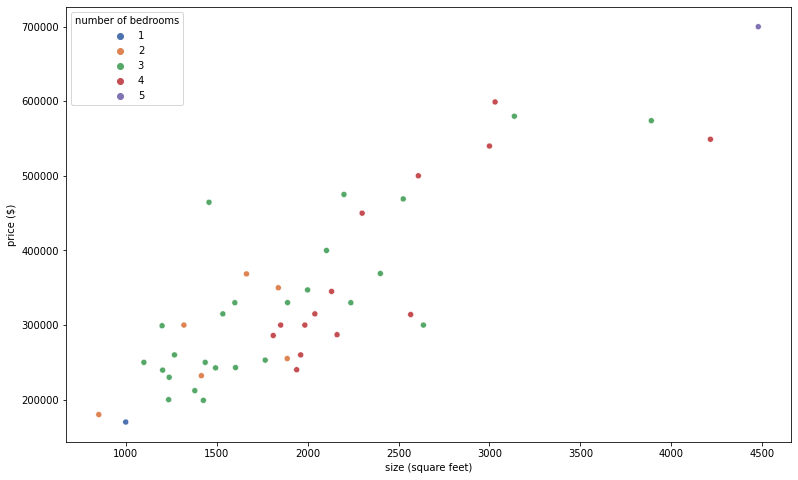

In [30]:
plt.figure(figsize=(13,8))
ax = sns.scatterplot(data=df, x='size (square feet)', y='price ($)', 
                     hue='number of bedrooms', palette='deep')
plt.show()

- Comment: Biểu diễn dữ liệu thành các điểm phân tán có xu hướng chung tạo thành dạng một đường thẳng với trục hoành là kích cỡ, trục tung là giá và số giường là các màu.

# Helper Functions

In [31]:
def standardize_train_set(X):
    #todo
    mu = np.mean(X, axis=0)
    #todo
    sigma = np.std(X, axis=0)
    #todo
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [32]:
def standardize_test_set(X, mu, sigma):
    #todo
    mu=np.array(mu)
    sigma=np.array(sigma)
    return (X - mu) / sigma

In [33]:
class LinearRegression:
    def __init__(self, alpha=0.001, iters=1000, verbose=False):
        self.alpha = alpha
        self.iters = iters
        self.verbose = verbose
        self.theta = None
    
    def calculate_absolute_error(self, X, y, theta):
        #todo
        m=len(y)
        h_theta=[]
        for i in range(m):
            h_theta.append([np.dot(theta, X[i])])
        h_theta = np.array(h_theta)
        y=np.array(y)
        loss = h_theta - y
        return np.sqrt(np.sum(loss**2))
    
    def gradient(self, X, y, theta):
        m = len(y)
        n = len(X[0])

        #todo
        h_theta=[]
        for i in range(m):
            h_theta.append([np.dot(theta, X[i])])
        h_theta = np.array(h_theta)
        y=np.array(y)
        loss = h_theta - y
        
        #todo
        dJ = []
        for i in range (n):
            dJ.append(np.sum(np.dot(loss.T, X[:, i])) / m)
        dJ = np.array(dJ)
        J = np.sum((loss ** 2) / (2*m))
        return (J, dJ)
    
    def gradient_descent(self, X, y):
        X = np.c_[np.ones(len(X),dtype='int64'), X]
        theta = np.zeros(X.shape[1])
        print(f'The total of training sample: {len(y)}')
        for i in range(self.iters):
            #todo
            J, dJ = self.gradient(X, y, theta)
            #todo
            theta = theta - self.alpha * dJ
            if self.verbose:
                print(f'Iter {i + 1}, loss = {self.calculate_absolute_error(X, y, theta)}')
        return theta
    
    def fit(self, X, y):
        self.theta = self.gradient_descent(X, y)
    
    def predict(self, X):
        X = np.c_[np.ones(len(X),dtype='int64'), X]
        results = []
        for Xi in X:
            #todo
            result=np.dot(self.theta, Xi)
            results.append(result)
        return results

# Main Function

## Train Model

In [34]:
#Load config
with open('config.json',) as f:
    configs = json.load(f)
#Feature-Label split
#todo
X = df.iloc[:, :-1]
#todo
y = df.iloc[:, [-1]]
#Standardize feature and Train model
X, mu, sigma = standardize_train_set(X)
model = LinearRegression(alpha= configs['alpha'], iters=configs['iters'], verbose=False)
model.fit(X, y)

The total of training sample: 47


## Visualize Model

In [35]:
x_surf, y_surf = np.meshgrid(np.linspace(df['size (square feet)'].min(), df['size (square feet)'].max()),
                 np.linspace(df['number of bedrooms'].min(), df['number of bedrooms'].max()))

surf_df = pd.DataFrame({'size (square feet)': x_surf.ravel(), 'number of bedrooms': y_surf.ravel()})
predicted = np.array(model.predict(standardize_test_set(surf_df.values, mu, sigma)))

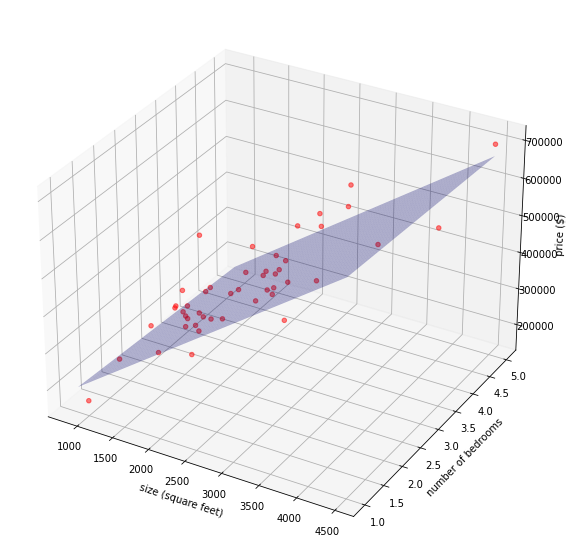

In [36]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['size (square feet)'], df['number of bedrooms']
           ,df['price ($)'], c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, predicted.reshape(x_surf.shape), color='b', alpha=0.3)

ax.set_xlabel('size (square feet)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price ($)')
plt.show()

- Comment: Đồ thị biểu diễn phương trình hồi quy tuyến tính dưới dạng một mặt phẳng và các chấm đỏ là các điểm phân tán nằm gần với mặt phẳng cho ra với sai số nhỏ nhất.

## Predict Sample

In [37]:
sample = [[1650, 3], [1500, 2], [2000, 4]]
# todo
sample_std = standardize_test_set(sample, mu, sigma)
y_predict = model.predict(sample_std)
for i in range(len(sample)):
    print(f'House price expected is {round(y_predict[i])}$')

House price expected is 293222$
House price expected is 280276$
House price expected is 333830$


## Save Results

In [38]:
#Save model
with open('model.json', 'w') as f:
    #todo
    json.dump({'theta: ': model.theta.tolist()}, f)
#Save prediction result
with open('price.json', 'w') as f:
    result=[]
    for i in range(len(sample)):
        result.append( #todo
            {'size (square feet): ': sample[i][0],
            #todo
            'number of bedrooms': sample[i][1],
            #todo
            'price ($)': round(y_predict[i])})
    json.dump(result, f)
        